In [49]:
import pandas as pd
import numpy as np
import csv
import os

In [50]:
# folder_name = '../csv_folder/source'
folder_name = '../csv_folder/Experiment1'

for _, _, files in os.walk(folder_name):
    for file in files:
        if file.endswith('.csv'):
            file_name = os.path.join(folder_name, file)
            print(file_name)

../csv_folder/Experiment1\5secEEGPSD_FullFnirsPSD.csv
../csv_folder/Experiment1\5secEEGPSD_FullFnirsPSD_FullFnirsTimeDomain.csv
../csv_folder/Experiment1\RFECV-5secEEGPSD_FullFnirsPSD_FullFnirsTimeDomain_R-C1-C2-N1-N2-V.csv
../csv_folder/Experiment1\RFECV-5secEEGPSD_FullFnirsPSD_FullFnirsTimeDomain_R-C1-C2-N1-N2.csv
../csv_folder/Experiment1\RFECV-5secEEGPSD_FullFnirsPSD_FullFnirsTimeDomain_R-C1-C2-V.csv
../csv_folder/Experiment1\RFECV-5secEEGPSD_FullFnirsPSD_FullFnirsTimeDomain_R-C1-C2.csv
../csv_folder/Experiment1\RFECV-5secEEGPSD_FullFnirsPSD_FullFnirsTimeDomain_R-N1-N2-V.csv
../csv_folder/Experiment1\RFECV-5secEEGPSD_FullFnirsPSD_FullFnirsTimeDomain_R-N1-N2.csv
../csv_folder/Experiment1\RFECV-5secEEGPSD_FullFnirsPSD_FullFnirsTimeDomain_R-V.csv
../csv_folder/Experiment1\RFECV-5secEEGPSD_FullFnirsPSD_FullFnirsTimeDomain_R.csv


In [51]:
filename = 'RFECV-5secEEGPSD_FullFnirsPSD_FullFnirsTimeDomain_R-C1-C2-N1-N2-V.csv'
file = os.path.join(folder_name, filename)
df = pd.read_csv(file)
print(df.columns[2])

eeg_act-0_feat-Px_band-Delta_ch-31


In [52]:
types = set()
acts = set()
feats = set()
bands = set()
channels = set()

for col in df.columns:
    parts = col.split('_')
    if parts[0] != 'eeg' and parts[0] != 'fnirs':
        continue
    types.add(parts[0])
    for part in parts:
        if part.startswith('act'):
            acts.add(part)
        elif part.startswith('feat'):
            feats.add(part)
        elif part.startswith('band'):
            bands.add(part)
        elif part.startswith('ch'):
            channels.add(part)
        

print(types)
print(acts)
print(feats)
print(bands)
print(channels)

{'fnirs', 'eeg'}
{'act-2', 'act-3', 'act-1', 'act-5', 'act-4', 'act-0'}
{'feat-Px', 'feat-Pm', 'feat-median', 'feat-std', 'feat-mean', 'feat-Pd'}
{'band-Delta', 'band-Gamma1', 'band-Alpha', 'band-lfo', 'band-Beta', 'band-vlfo', 'band-Gamma2', 'band-Theta'}
{'ch-16', 'ch-27', 'ch-6', 'ch-20', 'ch-30', 'ch-4', 'ch-7', 'ch-1', 'ch-13', 'ch-2', 'ch-22', 'ch-21', 'ch-3', 'ch-0', 'ch-5', 'ch-26', 'ch-15', 'ch-31', 'ch-17'}


In [53]:
def get_features(column_name: str):
    parts = column_name.split('_')
    src_type = parts[0]
    act = None
    feat = None
    band = None
    for part in parts:
        if part.startswith('act'):
            act = part
        elif part.startswith('feat'):
            feat = part
        elif part.startswith('band'):
            band = part
    return src_type, act, feat, band

In [54]:
import matplotlib.pyplot as plt


def get_one_row(row, display=True):
    """
    Display one row EEG ACT-0 data
    :return: the signal dictionary of the row
    """

    signals = {
        src_type: { act: { feat: { band: [] for band in bands } for feat in feats } for act in acts } for src_type in types
    }

    for col in df.columns:
        src_type, act, feat, band = get_features(col)
        if act is not None and feat is not None and band is not None:
            signals[src_type][act][feat][band].append(row[col])

    if display:
        feat_len = len(feats)
        band_len = len(bands)
        act = 'act-0'
        src_type = 'eeg'
        
        fig, axs = plt.subplots(feat_len, band_len, figsize=(12, 8), dpi=150)  # 调整纵横比和像素密度
        fig.suptitle('eeg act-0', fontsize=16)
        
        for i, feat in enumerate(feats):
            for j, band in enumerate(bands):
                axs[i, j].plot(signals[src_type][act][feat][band])
                axs[i, j].set_title(f"{feat} {band}", fontsize=10)
                axs[i, j].tick_params(axis='both', which='major', labelsize=8)

        plt.tight_layout(rect=[0, 0, 1, 0.96])  # 调整布局避免标题重叠
        plt.show()

    return signals

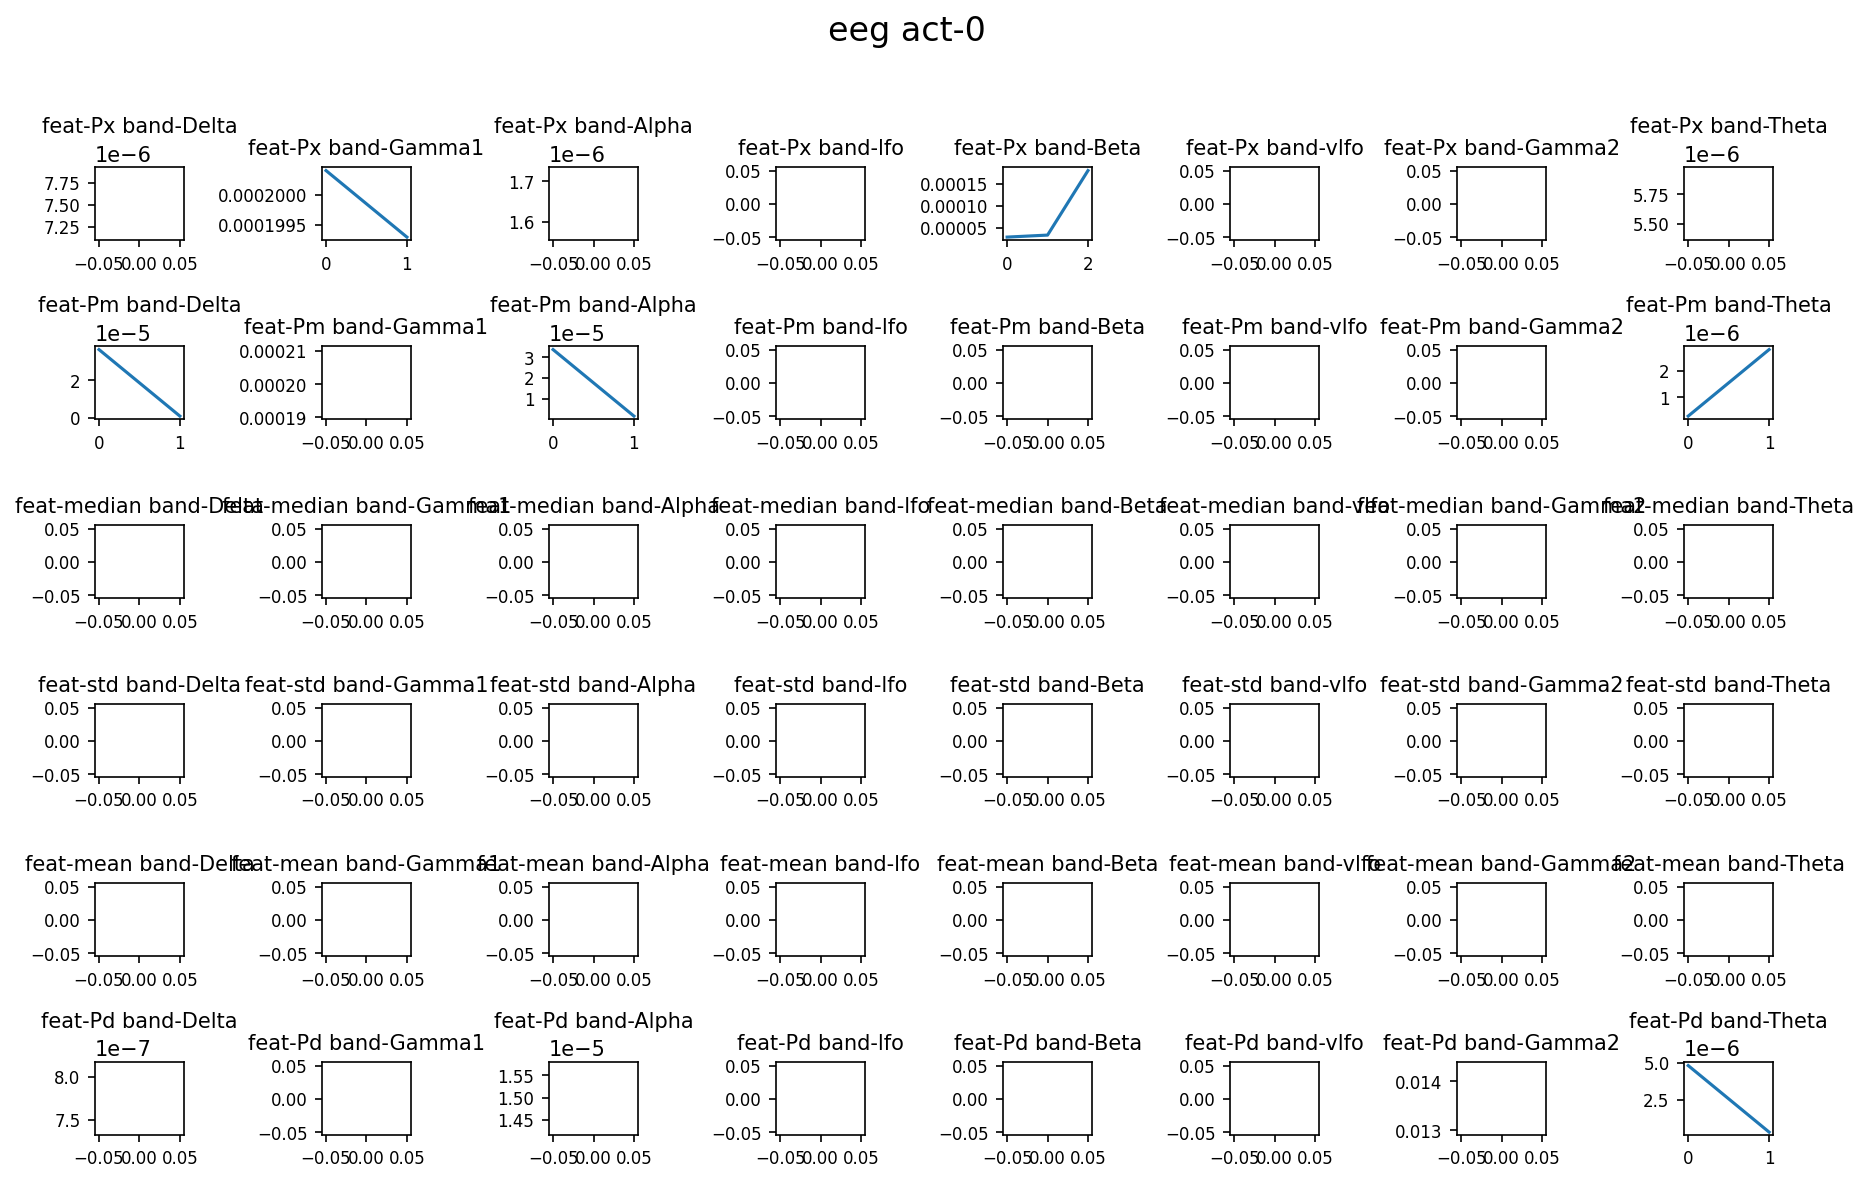

In [55]:
test_signals = get_one_row(df.iloc[0])

In [56]:
def get_one_patient(rows, src_type='eeg', act='act-0', feat='feat-Pd', band='band-Alpha'):
    """
    Display one patient's certain data
    """
    signals = get_one_row(rows.iloc[0], dispaly=False)
    for i in range(1, len(rows)):
        row = rows.iloc[i]
        for col in df.columns:
            src_type, act, feat, band = get_features(col)
            if act is not None and feat is not None and band is not None:
                signals[src_type][act][feat][band].append(row[col])
    
    plt.plot(signals[src_type][act][feat][band])

In [57]:
rows = df[df['label'] == 0]
get_one_patient(rows)

TypeError: get_one_row() got an unexpected keyword argument 'dispaly'